# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
from api_keys import weather_api_key
from citipy import citipy
import random
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# List for holding lat_lngs and cities
cities = []
count = 0

#generate random lat and lon coordinates
while count < 750:
    lat = random.randint(-90,90)
    lon = random.randint(-180,180)

    #do not add to "cities" list if nearest city is duplicate
    if citipy.nearest_city(lat,lon) not in cities:
        cities.append(citipy.nearest_city(lat, lon))
        count = count +1 
    
len(cities)

750

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create a list to store JSON
city_data = []

#config info
url = "http://api.openweathermap.org/data/2.5/weather"
params = {'appid': weather_api_key,
          'q': '',
          'units': 'imperial'}

# Loop through each city 
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.
counter = 0
for index, city in enumerate(cities):
    try:
        counter=counter + 1
        params['q'] = city.city_name 
        print(f"Weather Data #{counter}  |  {city.city_name}")
        print(f"Requested URL: {url + '?units=' + params['units'] + '&APPID=' + params['appid'] + '&q=' + city.city_name.replace(' ', '%20')}")
        response = requests.get(url, params=params).json()
        city_data.append(response)
    except:
        print(f"weather data for {city.city_name} is not available")
# Print JSON structure
print(json.dumps(response, indent=4, sort_keys=True))

Weather Data #1  |  amderma
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b5098cdf4098aecebabbfdc467546e7a&q=amderma
Weather Data #2  |  hilo
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b5098cdf4098aecebabbfdc467546e7a&q=hilo
Weather Data #3  |  punta arenas
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b5098cdf4098aecebabbfdc467546e7a&q=punta%20arenas
Weather Data #4  |  tasiilaq
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b5098cdf4098aecebabbfdc467546e7a&q=tasiilaq
Weather Data #5  |  mys shmidta
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b5098cdf4098aecebabbfdc467546e7a&q=mys%20shmidta
Weather Data #6  |  ostrovnoy
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b5098cdf4098aecebabbfdc467546e7a&q=ostrovnoy
Weather Data #7  |  cidreira
Requested URL: http://api

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [111]:
# collect data and put into a dataframe
city= []
clouds= []
country= []
date= []
humidity= []
lat= []
lng= []
temp= []
wind= []
for data in city_data:
    if data['cod']==200:
        city.append(data['name'])
        clouds.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])
        wind.append(data['wind']['speed'])

weather_dict = {"City": city,
                "Cloudiness": clouds,
                "Country": country,
                "Humidity": humidity,
                "Date": date,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": temp,
                "Wind Speed": wind}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df=weather_data_df[["City", "Lat","Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]

weather_data_df.head()

# Export the City_Data into a csv
weather_data_df.to_csv("Output/WeatherDataCities2.csv", index=False)

In [112]:
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,6.880000e+02
mean,20.829855,18.991177,66.923663,71.507267,45.327035,7.800015,1.599096e+09
std,33.438106,87.603693,13.820745,21.280341,40.825781,5.601059,6.762106e+01
min,-54.800000,-179.170000,24.940000,1.000000,0.000000,0.130000,1.599096e+09
25%,-7.087500,-59.325000,55.990000,60.000000,1.000000,3.595000,1.599096e+09
50%,25.150000,22.915000,68.210000,76.000000,40.000000,6.845000,1.599096e+09
75%,50.065000,96.397500,78.800000,88.000000,90.000000,10.290000,1.599096e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,33.310000,1.599096e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [113]:
#  Get the indices of cities that have humidity over 100%.


In [114]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

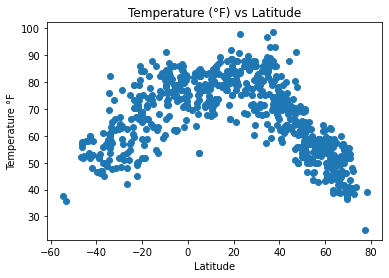

In [115]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Max Temp"],marker ="o")
plt.title("Temperature (°F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature °F")
plt.savefig("Output/Temperature (°F) vs Latitude")
plt.show()

 
* the code is analyzing temperature vs. latitude. 
* the relationship here is that temperature rises with latitude when it's negative, but decreases as latitude increases past 0. 

## Latitude vs. Humidity Plot

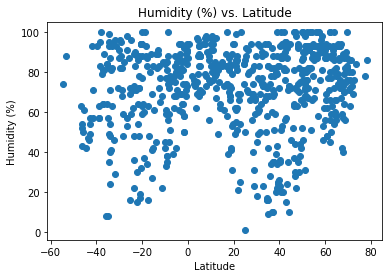

In [116]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"],marker ="o")
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Output/Humidity (%) vs. Latitude.png")
plt.show()

* This plot is analyzing humidity (%) vs. latitude.
* There is no significant relationship between latitude and humidity %

## Latitude vs. Cloudiness Plot

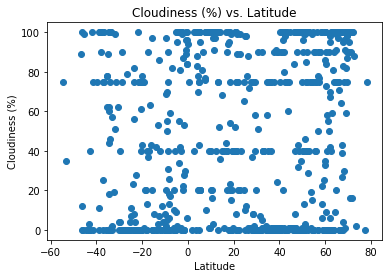

In [117]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"],marker ="o")
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Output/Cloudiness (%) vs. Latitude.png")
plt.show()

* This plot analyzes cloudiness (%) vs. Latitude 
* There is no correlation between cloudiness (%)

## Latitude vs. Wind Speed Plot

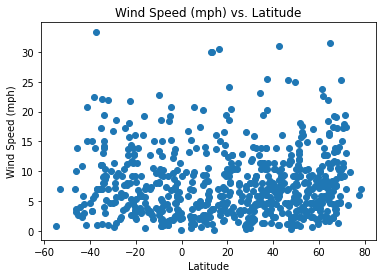

In [118]:
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"],marker ="o")
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Output/Wind Speed (mph) vs. Latitude.png")
plt.show()

* This graph is analyzing wind speed (mph) vs. Latitude
* There is no relationship between wind speed and latitude

## Linear Regression

In [119]:
#make two hemispheres
northern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] >=0]
southern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] <0]

#define a function to call linear regressions and scatter plots
def linear_regressions(x_values,y_values):
    print(f"R-squared is: {round(st.pearsonr(x_values,y_values)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_eq
def annotate(line_eq, a, b):
    plt.annotate(line_eq, (a,b), fontsize=15, color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is: -0.78


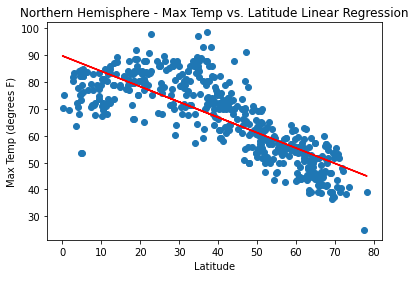

In [139]:
equation = linear_regressions(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (degrees F)")
plt.savefig("Output/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is: 0.73


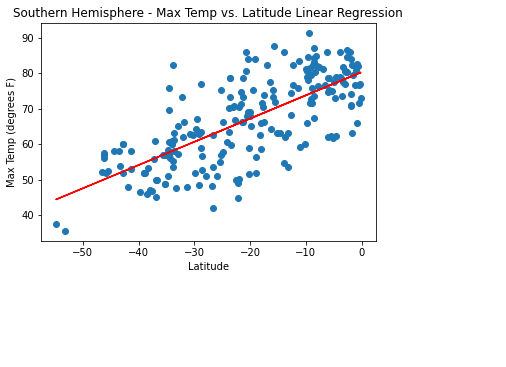

In [140]:
equation = linear_regressions(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (degrees F)")
plt.savefig("Output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

* These graphs are showing Max temperature vs. latitude linear regression
* The correlations between max temperature and latitude in both hemispheres are a high positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is: 0.02


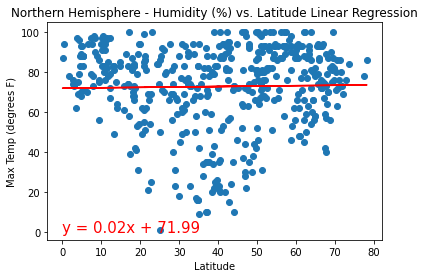

In [141]:
equation = linear_regressions(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (degrees F)")
plt.savefig("Output/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is: 0.1


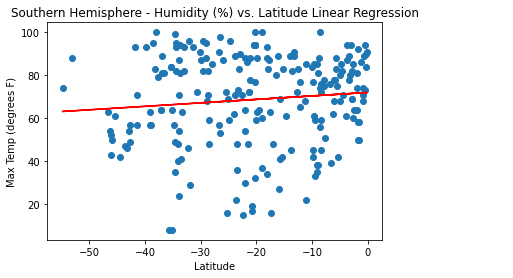

In [142]:
equation = linear_regressions(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (degrees F)")
plt.savefig("Output/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

* These plots show the Humidity (%) versus Latitude Linear Regression
* Humidity and Latitude have a negligible correlation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared is: 0.05


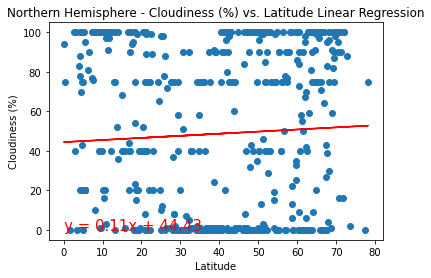

In [143]:
equation = linear_regressions(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Output/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared is: 0.0


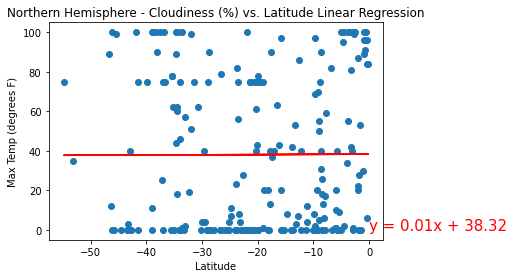

In [144]:
equation = linear_regressions(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (degrees F)")
plt.savefig("Output/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

* These plots show the Cloudiness (%) versus Latitude Linear Regression
* Cloudiness and Latitude have a negligible correlation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared is: 0.12


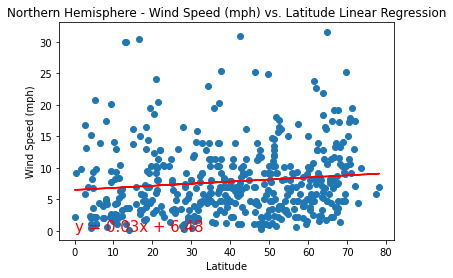

In [145]:
equation = linear_regressions(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Output/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared is: -0.15


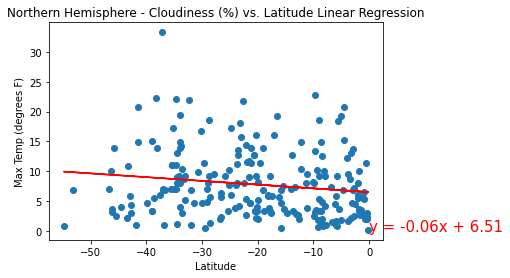

In [146]:
equation = linear_regressions(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Output/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

* These plots show the Wind Speed (mph) versus Latitude Linear Regression
* Wind Speed (mph) and Latitude have a negligible correlation